**Veri setinde eksik değer yoktur. Değerler her 15 dakikada bir kW cinsindendir. Değerleri kWh'ye dönüştürmek için değerleri 4'e bölmek gerekir. Her sütun bir müşteriyi temsil eder. Bazı müşteriler 2011'den sonra oluşturulmuştur. Bu durumlarda tüketim sıfır olarak kabul edilmiştir. Tüm zaman etiketleri Portekiz saatine göre raporlanmıştır. Ancak tüm günler 96 ölçüm (24*4) içerir. Her yıl Mart ayında saat değişikliği gününde (sadece 23 saat olan), 1:00 ile 2:00 arasındaki değerler tüm noktalar için sıfırdır. Her yıl Ekim ayında saat değişikliği gününde (25 saat olan), 1:00 ile 2:00 arasındaki değerler iki saatlik tüketimi toplar.**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv(
    "../dataa/LD2011_2014.txt",
    sep=";",                # AYRAÇ noktalı virgül
    quotechar='"',          # değerler " " içinde
    decimal=",",            # ondalık ayracı virgül
)
df.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.dtypes

Unnamed: 0     object
MT_001        float64
MT_002        float64
MT_003        float64
MT_004        float64
               ...   
MT_366        float64
MT_367        float64
MT_368        float64
MT_369        float64
MT_370        float64
Length: 371, dtype: object

In [14]:
df = df.rename(columns={"Unnamed: 0": "time"})
df.head()

,time,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df2 = df.copy()
df2['time'] = pd.to_datetime(df2.iloc[:, 0])
df2 = df2.set_index('time')

In [19]:
df2.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df2.isnull().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

In [29]:
print(df2.index.min(), df2.index.max())
#df2.index.freq
df2.index.is_monotonic_increasing

2011-01-01 00:15:00 2015-01-01 00:00:00


True

In [30]:
df2= df2.asfreq("15min")

In [33]:
df2.index.to_series().diff().value_counts().head() 

time
0 days 00:15:00    140255
Name: count, dtype: int64

In [37]:
# En fazla varyansa sahip sensörler.
df2.var().sort_values(ascending=False).head(10)

MT_362    1.497067e+09
MT_370    8.455089e+07
MT_196    5.386251e+07
MT_279    9.799805e+06
MT_364    7.465201e+06
MT_339    4.531938e+06
MT_208    4.332879e+06
MT_228    3.872456e+06
MT_363    3.245354e+06
MT_224    3.122767e+06
dtype: float64

Text(0.5, 1.0, 'Correlation for Top 10 Sensors')

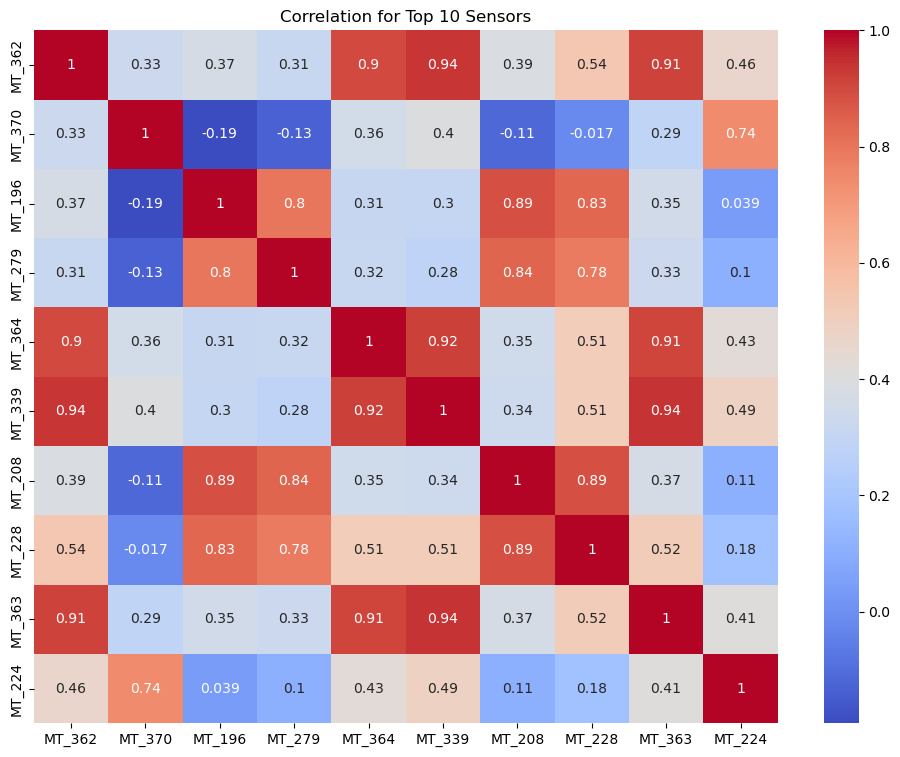

In [38]:
import seaborn as sns
# Korelasyon tüm sensörler için yapılamıyacak akdar çok bu yüzden en yüksek varyasnasa sahip olanalrı yağacaüız.
top10 = df2.var().sort_values(ascending=False).head(10).index
corr = df2[top10].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation for Top 10 Sensors")